# BLE distance measurement results

The tests have been made with two NRF54L15-DK device (v0.9.2). 

1. **Accuracy test**

    The accuracy was test for both method (RSSI and CS). Distance measurements were taken at every meter from 0m to 10m. The distance was controlled using a measuring tape. The tests have been performed in a indoor and outdoor environement for both RSSI and Channel Sounding measurement. 21 measures have been made for each reference distance.

    The results store in 4 different files.

    - _cs-indoor-meas.csv_
    - _cs-outdoor-meas.csv_
    - _rssi-indoor-meas.csv_
    - _rssi-outdoor-meas.csv_
    
    The results are plot for each test. The mean value and the standart deviation is calculated for each reference distance. Finally, the global error and standard deviation is computed to help the comparaison of both methods.

2.  **RSSI measurement optimisation**

    The formula to estimate the distance take two parameters : the received signal strength at distance 1m and the path loss index. By choosing the correct values for those parameters, the accuracy is increase. The received signal strength at distance 1m is measured. The path loss index is estimated according to the environment. It can be then optimized. 
    
    A simple path loss index optimization is proposed as a example. It use the measured RSSI and find the parameter that minimise the global error.

3. **Range test** 

    The range test are also analysed in this notebook. It is compose of two files :
    - _rssi-range-meas.csv_
    - _rssi-range-meas.csv_

    The mean value and the standart deviation is calculated for each reference distance. The global error and standard deviation is also computed to help the comparaison of both methods.he global error and standard deviation is computed to help the comparaison of both methods.


**Data format**

The data has the followings format :

- RSSI tests : The CSV file, with the header *meas num, rssi [dBm], distance [m]*, contains 11 measurements, each consisting of 21 samples numbered consecutively from 0 to 220, following one another directly.
- CS tests :  The CSV file, with the header *num meas, ifft [m], phase slope [m], rtt [m]*, contains 11 measurements, each consisting of 21 samples numbered consecutively from 0 to 220, following one another directly.




In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [ ]:
# Read CSV files
cs_indoor = pd.read_csv('accuracy/cs-indoor-meas.csv')
cs_outdoor = pd.read_csv('accuracy/cs-outdoor-meas.csv')
rssi_indoor = pd.read_csv('accuracy/rssi-indoor-meas.csv')
rssi_outdoor = pd.read_csv('accuracy/rssi-outdoor-meas.csv')
rssi_range = pd.read_csv('range/rssi-range-meas.csv')
cs_range = pd.read_csv('range/cs-range-meas.csv')

# quick summary
# for name, df in [
#     ('cs_indoor', cs_indoor),
#     ('cs_outdoor', cs_outdoor),
#     ('rssi_indoor', rssi_indoor),
#     ('rssi_outdoor', rssi_outdoor),
#     ('rssi_range', rssi_range),
#     ('cs_range', cs_range)
# ]:
#     print(f"{name}: shape={df.shape}")
#     display(df.head())


In [ ]:
# Mean calculation function
def calculate_mean_distance(distance_data, column_name, nbr_samples=21):
        
    distance_values = distance_data[column_name].values
    mean_distance   = []

    for i in range(11): 
        start_idx = i * nbr_samples
        end_idx = (i + 1) * nbr_samples

        if end_idx <= len(distance_values):
            mean_val = np.mean(distance_values[start_idx:end_idx])
            floored_mean = np.floor(mean_val * 100) / 100
            mean_distance.append(floored_mean)
        
    return mean_distance


In [ ]:
# Standard deviation calculation function
def calculate_std_distance(distance_data, column_name, nbr_samples=21):
        
    distance_values = distance_data[column_name].values
    std_distance   = []

    for i in range(11):
        start_idx = i * nbr_samples
        end_idx = (i + 1) * nbr_samples

        if end_idx <= len(distance_values):
            std_val = np.std(distance_values[start_idx:end_idx])
            floored_std = np.floor(std_val * 100) / 100
            std_distance.append(floored_std)

    return std_distance

In [ ]:
# Plotting function
# - The X axis represents the reference distance when the Y axis represent the measured distance. 
# - The red line is the reference. 
# - The samples are represented in the form of scatter, the blue dots. 
# - The orange dot represent the mean value of the sample from the same reference along with black line that represents the standard deviation.
def plot_distance_measurements(distance_data, column_name, nbr_samples=21, title="Distance Measurements"):
    """
    Plot reference distance vs measured distance with scatter points and reference line.
    """
    
    # Prepare data for plotting
    ref_distances = []
    measured_distances = []
    
    # Extract the distance column as numpy array
    distance_values = distance_data[column_name].values

    # For each reference distance (0-10m)
    for i in range(11):
        ref_dist = i  # Reference distance in meters
        
        # Get the 21 distance measurements for this reference distance
        start_idx = i * nbr_samples
        end_idx = (i + 1) * nbr_samples

        # Check if we have enough data
        if end_idx <= len(distance_values):
            distance_measurements = distance_values[start_idx:end_idx]
            
            # Store each measurement with its reference distance
            for measured_dist in distance_measurements:
                ref_distances.append(ref_dist)
                measured_distances.append(measured_dist)
    
    # Create the plot
    fig = plt.figure(figsize=(12, 8))
    
    # Plot scatter points for all measurements
    plt.scatter(ref_distances, measured_distances, alpha=0.6, s=50, 
                label='Measurements', color='blue')
    
    # Error bars for standard deviation
    plt.errorbar(range(11), calculate_mean_distance(distance_data, column_name, nbr_samples), 
                 yerr=calculate_std_distance(distance_data, column_name, nbr_samples), 
                 fmt='o', color='orange', ecolor='black',label='Mean + STD', elinewidth=2, capsize=5, zorder=4)
        
    # Plot reference line (1:1 correspondence)
    ref_line = np.linspace(0, 10, 100)
    plt.plot(ref_line, ref_line, 'r-', linewidth=2, label='Reference')
    
        # Set major ticks every 1 unit
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))

    # Labels and formatting
    plt.xlabel('Reference Distance [m]', fontsize=12)
    plt.ylabel('Measured Distance [m]', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, which='major')
    plt.legend(fontsize=10)
    plt.xlim(-0.5, 10.5)
    plt.ylim(0, 10.5 if max(measured_distances) <= 10.5 else max(measured_distances) + 0.5)


## 1. Accuracy tests

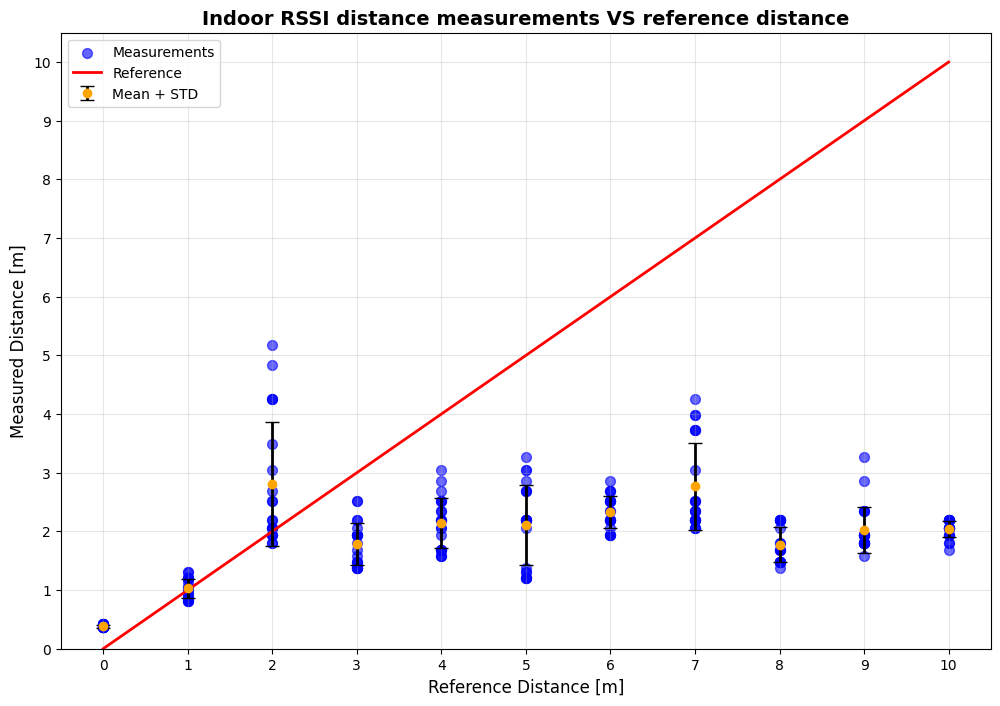

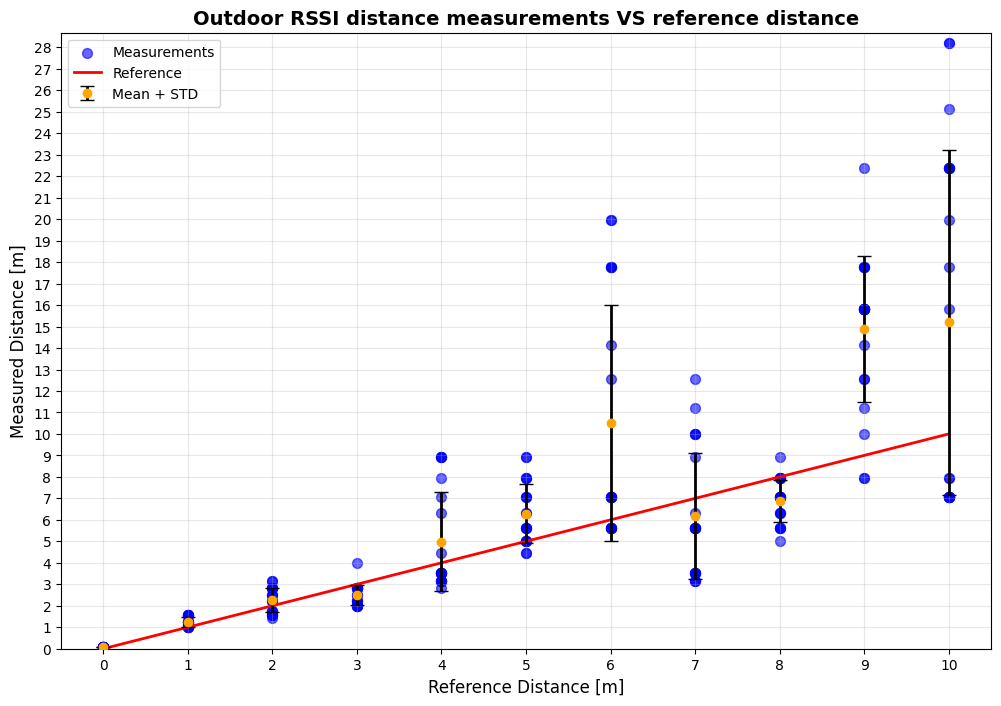

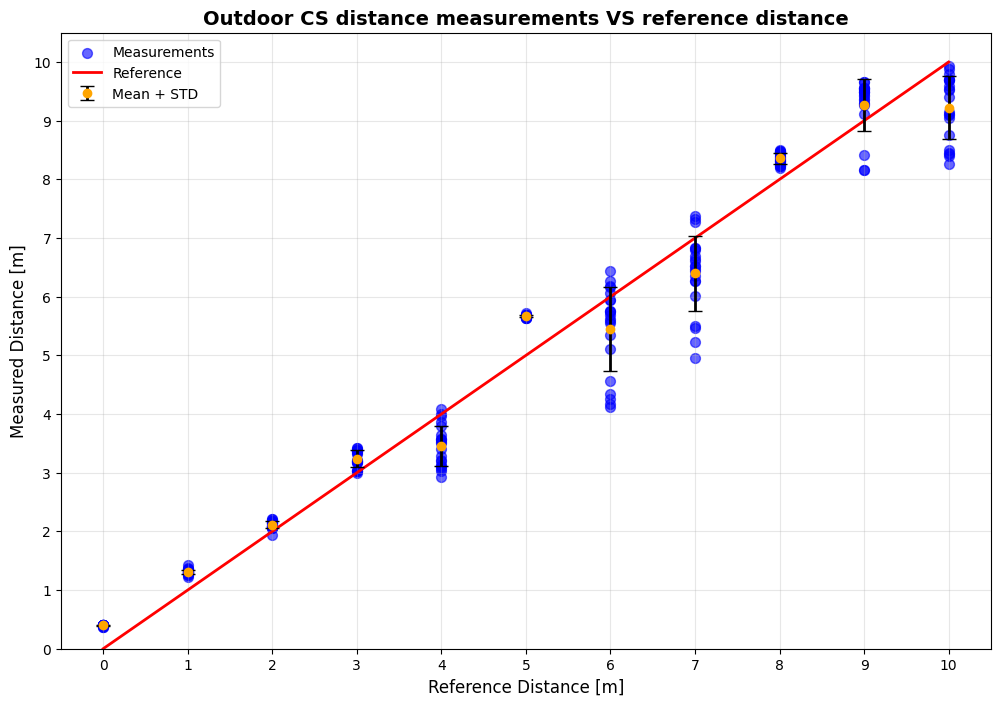

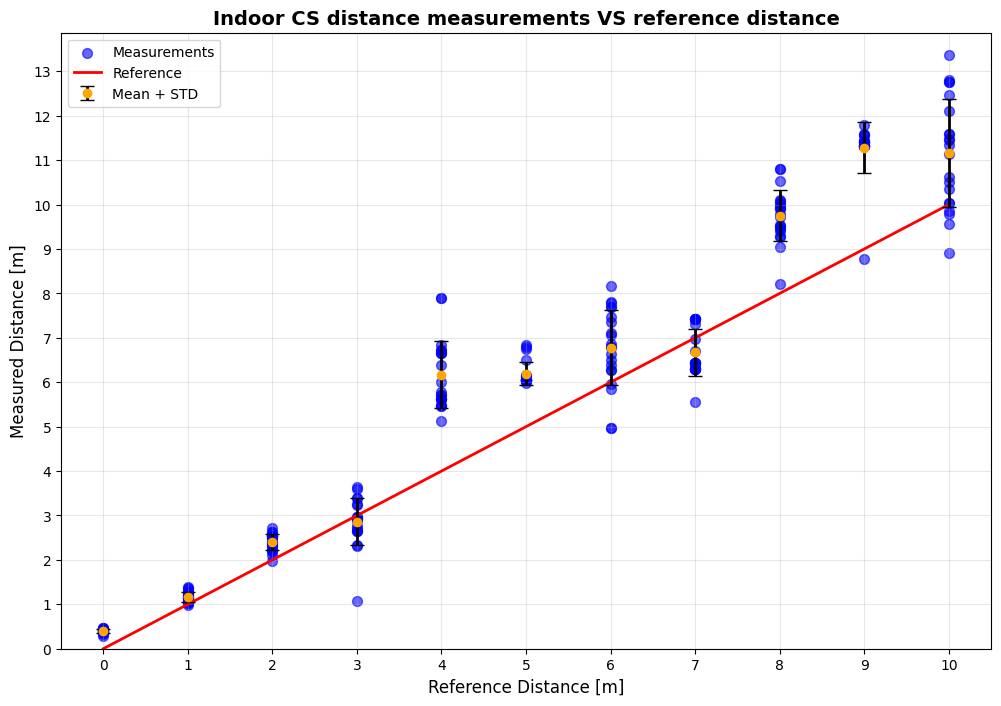

In [ ]:
# Plotting distance measurements
plot_distance_measurements(rssi_indoor, "distance [m]", 21, "Indoor RSSI distance measurements VS reference distance")
plot_distance_measurements(rssi_outdoor, "distance [m]", 21, "Outdoor RSSI distance measurements VS reference distance")
plot_distance_measurements(cs_outdoor, "ifft [m]", 21, "Outdoor CS distance measurements VS reference distance")
plot_distance_measurements(cs_indoor, "ifft [m]", 21, "Indoor CS distance measurements VS reference distance")

In [16]:
# Calculate mean distances and their differences from reference
rssi_indoor_mean_distance = calculate_mean_distance(rssi_indoor, "distance [m]", 21)
rssi_outdoor_mean_distance = calculate_mean_distance(rssi_outdoor, "distance [m]", 21)
cs_indoor_mean_distance = calculate_mean_distance(cs_indoor, "ifft [m]", 21)
cs_outdoor_mean_distance = calculate_mean_distance(cs_outdoor, "ifft [m]", 21)

ref_distances = list(range(11))
rssi_indoor_mean_distance_diff = np.abs(np.array(rssi_indoor_mean_distance) - np.array(ref_distances))
rssi_outdoor_mean_distance_diff = np.abs(np.array(rssi_outdoor_mean_distance) - np.array(ref_distances))
cs_indoor_mean_distance_diff = np.abs(np.array(cs_indoor_mean_distance) - np.array(ref_distances))
cs_outdoor_mean_distance_diff = np.abs(np.array(cs_outdoor_mean_distance) - np.array(ref_distances))

rssi_indoor_std = calculate_std_distance(rssi_indoor, "distance [m]", 21)
rssi_outdoor_std = calculate_std_distance(rssi_outdoor, "distance [m]", 21)
cs_indoor_std = calculate_std_distance(cs_indoor, "ifft [m]", 21)
cs_outdoor_std = calculate_std_distance(cs_outdoor, "ifft [m]", 21)

rssi_indoor_std_mean = np.mean(rssi_indoor_std)
rssi_outdoor_std_mean = np.mean(rssi_outdoor_std)
cs_indoor_std_mean = np.mean(cs_indoor_std)
cs_outdoor_std_mean = np.mean(cs_outdoor_std)

print("Indoor RSSI mean distance:", rssi_indoor_mean_distance)
print("Indoor RSSI mean distance diff:", rssi_indoor_mean_distance_diff)
print("Indoor RSSI std:", rssi_indoor_std)
print("Indoor RSSI std mean:", rssi_indoor_std_mean)
print("\n")

print("Outdoor RSSI mean distance:", rssi_outdoor_mean_distance)
print("Outdoor RSSI mean distance diff:", rssi_outdoor_mean_distance_diff)
print("Outdoor RSSI std:", rssi_outdoor_std)
print("Outdoor RSSI std mean:", rssi_outdoor_std_mean)
print("\n")

print("Indoor CS mean distance:", cs_indoor_mean_distance)
print("Indoor CS mean distance diff:", cs_indoor_mean_distance_diff)
print("Indoor CS std:", cs_indoor_std)
print("Indoor CS std mean:", cs_indoor_std_mean)
print("\n")

print("Outdoor CS mean distance:", cs_outdoor_mean_distance)
print("Outdoor CS mean distance diff:", cs_outdoor_mean_distance_diff)
print("Outdoor CS std:", cs_outdoor_std)
print("Outdoor CS std mean:", cs_outdoor_std_mean)
print("\n")

print("Indoor RSSI mean error and standart deviation:", np.mean(rssi_indoor_mean_distance_diff), rssi_indoor_std_mean)
print("Outdoor RSSI mean error and standart deviation:", np.mean(rssi_outdoor_mean_distance_diff), rssi_outdoor_std_mean)
print("Indoor CS mean error and standart deviation:", np.mean(cs_indoor_mean_distance_diff), cs_indoor_std_mean)
print("Outdoor CS mean error and standart deviation:", np.mean(cs_outdoor_mean_distance_diff), cs_outdoor_std_mean)

Indoor RSSI mean distance: [0.38, 1.03, 2.81, 1.78, 2.14, 2.11, 2.33, 2.77, 1.77, 2.03, 2.04]
Indoor RSSI mean distance diff: [0.38 0.03 0.81 1.22 1.86 2.89 3.67 4.23 6.23 6.97 7.96]
Indoor RSSI std: [0.02, 0.16, 1.06, 0.36, 0.43, 0.68, 0.27, 0.74, 0.3, 0.39, 0.14]
Indoor RSSI std mean: 0.4136363636363635


Outdoor RSSI mean distance: [0.07, 1.25, 2.26, 2.51, 4.99, 6.28, 10.52, 6.18, 6.88, 14.87, 15.2]
Outdoor RSSI mean distance diff: [0.07 0.25 0.26 0.49 0.99 1.28 4.52 0.82 1.12 5.87 5.2 ]
Outdoor RSSI std: [0.0, 0.22, 0.56, 0.46, 2.31, 1.38, 5.49, 2.94, 0.99, 3.4, 8.03]
Outdoor RSSI std mean: 2.3436363636363637


Indoor CS mean distance: [0.4, 1.16, 2.41, 2.86, 6.17, 6.19, 6.78, 6.67, 9.75, 11.28, 11.16]
Indoor CS mean distance diff: [0.4  0.16 0.41 0.14 2.17 1.19 0.78 0.33 1.75 2.28 1.16]
Indoor CS std: [0.04, 0.11, 0.18, 0.53, 0.76, 0.26, 0.85, 0.52, 0.57, 0.57, 1.21]
Indoor CS std mean: 0.509090909090909


Outdoor CS mean distance: [0.4, 1.31, 2.11, 3.24, 3.45, 5.67, 5.45, 6.4, 8.

## 2. RSSI measurement optimisation

In [19]:
# Distance calculation function
def calculate_distance(tx_power, rssi, n):
    return 10 ** ((tx_power - rssi) / (10 * n))

In [20]:
# Part loss index optimisation function
def optimize_path_loss_exponent(values):
        ref_dist = list(range(11))

        best_n = None
        min_error = float('inf')
        error = np.array([])

        c = np.linspace(2, 5, 25)

        for c_val in c:
                for rssi in values:
                        dist = calculate_distance(-40, rssi, c_val)
                        error = np.append(error, abs(dist - ref_dist[values.index(rssi)]))
                        
                if np.mean(error) < min_error:
                        min_error = np.mean(error)
                        best_c = c_val

        return best_c, min_error


rssi_indoor_optimised_values = optimize_path_loss_exponent(calculate_mean_distance(rssi_indoor, "rssi [dBm]",nbr_samples=21))

print("Optimized path loss exponent for RSSI Indoor:", rssi_indoor_optimised_values)

rssi_outdoor_optimised_values = optimize_path_loss_exponent(calculate_mean_distance(rssi_outdoor, "rssi [dBm]",nbr_samples=21))

print("Optimized path loss exponent for RSSI Outdoor:", rssi_outdoor_optimised_values)

Optimized path loss exponent for RSSI Indoor: (2.0, 1.9512251005356895)
Optimized path loss exponent for RSSI Outdoor: (2.375, 1.3444917228639164)


## 3. Range tests

In [18]:
# Calculate range test results
rssi_range_mean_distance = calculate_mean_distance(rssi_range, "distance [m]", 21)
cs_range_mean_distance = calculate_mean_distance(cs_range, "ifft [m]", 21)


ref_distances = 100

rssi_range_mean_distance_diff = np.abs(np.array(rssi_range_mean_distance) - np.array(ref_distances))
cs_range_mean_distance_diff = np.abs(np.array(cs_range_mean_distance) - np.array(ref_distances))


rssi_range_std = calculate_std_distance(rssi_range, "distance [m]", 21)
cs_range_std = calculate_std_distance(cs_range, "ifft [m]", 21)

print("Range RSSI mean distance:", rssi_range_mean_distance)
print("Range RSSI mean distance diff:", rssi_range_mean_distance_diff)
print("Range RSSI std:", rssi_range_std)
print("\n")

print("Range CS mean distance:", cs_range_mean_distance)
print("Range CS mean distance diff:", cs_range_mean_distance_diff)
print("Range CS std:", cs_range_std)
print("\n")


Range RSSI mean distance: [209.24]
Range RSSI mean distance diff: [109.24]
Range RSSI std: [81.13]


Range CS mean distance: [94.03]
Range CS mean distance diff: [5.97]
Range CS std: [0.08]


